1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(-99)

1.0112214926104486e-43

In [3]:

digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

In [4]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [5]:
digits.target.shape

(1797,)

In [6]:
# Creo un numpy array sólo con los registros de data correspondientes al target (label) 1 y 9)
digits.data = (digits.data[(digits.target==1)| (digits.target==9)])

In [7]:
digits.data.shape

(362, 64)

In [8]:
# Creo un numpy array sólo con los registros de target (label) correspondientes a los valores 1 y 9)
digits.target = (digits.target[(digits.target==1)| (digits.target==9)])

In [10]:
#ind_not_1_9 = [i for i, j in enumerate(digits.target) if (j != 1)&(j!=9)]


In [11]:
print("Image 2 Data Shape" , digits.data.shape)
print("Label 2 Data Shape" , digits.target.shape)

Image 2 Data Shape (362, 64)
Label 2 Data Shape (362,)


In [12]:
digits.data[0:50]

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0., 11., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  7., ...,  6.,  0.,  0.]])

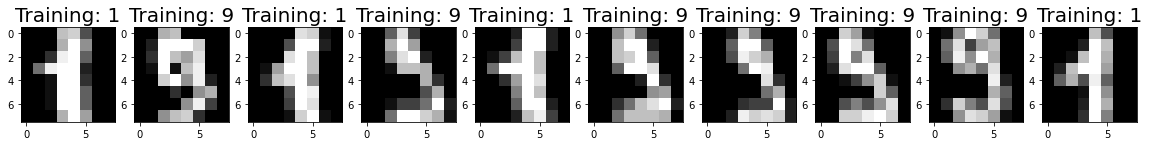

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

In [14]:
#Partir en conjunto de entrenamiento y de test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [15]:
#Aplicar el modelo de regresión logística (con valores por defecto)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

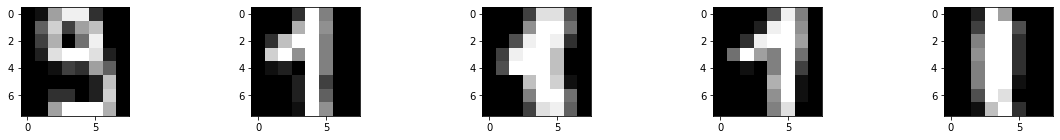

In [17]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

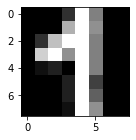

In [19]:
plt.rcParams['figure.figsize'] = 20, 2
first_test_image = x_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

In [21]:
# Predicción del modelo para el segundo elemento del conjunto de test
model.predict(x_test[1].reshape(1, -1))

array([1])

In [22]:
y_test[0:10]

array([9, 1, 1, 1, 1, 9, 9, 9, 1, 9])

In [23]:
model.predict(x_test[0:10])

array([9, 1, 1, 1, 1, 9, 9, 9, 1, 9])

In [25]:
model.predict(x_test[0:1])

array([9])

In [26]:
#Probabilidad del modelo
model.predict_proba(x_test[0:1])

array([[1.81230114e-08, 9.99999982e-01]])

In [29]:
#Probabilidad de acierto
print(max(model.predict_proba(x_test[0:1])[0])*100 , " %")

99.99999818769886  %


In [30]:
# Usando score para ver la asertividad del modelo sobre todo el conjunto de test
score = model.score(x_test, y_test)
print(score * 100, "%")

100.0 %


In [31]:
#Matriz de confusión
import sklearn.metrics as metrics
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[44  0]
 [ 0 47]]


`Se mejora la precisión del modelo  pues la variable target tiene muchos menos posibles valores (2 en vez de 10)`